In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import missingno as msno
import nltk

In [2]:
ut = pd.read_csv('untrustworthy.csv')
tr = pd.read_csv('trustworthy.csv')
mt = pd.read_csv('mostlytrusty.csv')

In [3]:
tr.head()

,links,url,text
0,"'Merci, mon ami': Biden, Trudeau renew bilater...",https://www.politico.com/news/2021/02/23/biden...,"So after four years of trade wars, name-callin..."
1,Democrats' $1.9T Covid aid bill faces the Sena...,https://www.politico.com/news/2021/02/24/democ...,MacDonough will dissect the budget impact of e...
2,"Lawrence Ferlinghetti, poet and activist, dies...",https://www.politico.com/news/2021/02/23/lawre...,“The dominant American mercantile culture may ...
3,‘It can only get better’: Linda Thomas-Greenfi...,https://www.politico.com/news/2021/02/23/un-am...,U.N. officials told POLITICO they hope to see ...
4,Judge rips Capitol rioter’s Trump defense,https://www.politico.com/news/2021/02/23/capit...,At numerous bail hearings in the Capitol-riot-...


In [4]:
mt.head()

,links,url,text
0,"'Merci, mon ami': Biden, Trudeau renew bilater...",https://www.politico.com/news/2021/02/23/biden...,"So after four years of trade wars, name-callin..."
1,Democrats' $1.9T Covid aid bill faces the Sena...,https://www.politico.com/news/2021/02/24/democ...,MacDonough will dissect the budget impact of e...
2,"Lawrence Ferlinghetti, poet and activist, dies...",https://www.politico.com/news/2021/02/23/lawre...,“The dominant American mercantile culture may ...
3,‘It can only get better’: Linda Thomas-Greenfi...,https://www.politico.com/news/2021/02/23/un-am...,U.N. officials told POLITICO they hope to see ...
4,Judge rips Capitol rioter’s Trump defense,https://www.politico.com/news/2021/02/23/capit...,At numerous bail hearings in the Capitol-riot-...


In [5]:
faketxt= pd.DataFrame(ut,columns=['links','text'])
faketxt['value']='F'
truetxt= pd.DataFrame(tr,columns=['links','text'])
truetxt['value']='T'
midtxt= pd.DataFrame(tr,columns=['links','text'])
midtxt['value']='T'

In [6]:
midtxt.head()

,links,text,value
0,"'Merci, mon ami': Biden, Trudeau renew bilater...","So after four years of trade wars, name-callin...",T
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T


In [7]:
f = [truetxt,midtxt,faketxt]
df = pd.concat(f, sort=False)

In [8]:
#faketxt= pd.DataFrame(fake,columns=['title','text'])
#faketxt['value']='false'

In [9]:
#truetxt= pd.DataFrame(true,columns=['title','text'])
#truetxt['value']='true'

In [10]:
#faketxt.head()

In [11]:
#truetxt.head()

In [12]:
#df = truetxt.append(faketxt)

In [13]:
df.head()

,links,text,value
0,"'Merci, mon ami': Biden, Trudeau renew bilater...","So after four years of trade wars, name-callin...",T
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T


In [14]:
df.dropna()
df.shape

(3331, 3)

In [15]:
df.value.value_counts()

T    3162
F     169
Name: value, dtype: int64

In [16]:
df = df.sample(frac = 1) 

In [17]:
df.head()

,links,text,value
1118,Georgia Republicans File Sweeping Elections Bi...,The bill aims to restrict the location of secu...,T
1176,Here's What's In House Democrats' $1.9 Trillio...,Expanded and extended federal unemployment ben...,T
606,Native Americans Finally Have a Cabinet Nomine...,Some senators from the GOP aren’t thinking twi...,T
1025,"With Or Without Trump, Republicans Will Likely...","If Trump is to rise again, it will once again ...",T
515,Cruz says his wife was ‘pissed’ about leaked t...,"“I will tell you, that she is pissed about. Al...",T


In [18]:
df= df.reset_index()

In [19]:
df.head()

,index,links,text,value
0,1118,Georgia Republicans File Sweeping Elections Bi...,The bill aims to restrict the location of secu...,T
1,1176,Here's What's In House Democrats' $1.9 Trillio...,Expanded and extended federal unemployment ben...,T
2,606,Native Americans Finally Have a Cabinet Nomine...,Some senators from the GOP aren’t thinking twi...,T
3,1025,"With Or Without Trump, Republicans Will Likely...","If Trump is to rise again, it will once again ...",T
4,515,Cruz says his wife was ‘pissed’ about leaked t...,"“I will tell you, that she is pissed about. Al...",T


In [20]:
del df['index']
df.head()

,links,text,value
0,Georgia Republicans File Sweeping Elections Bi...,The bill aims to restrict the location of secu...,T
1,Here's What's In House Democrats' $1.9 Trillio...,Expanded and extended federal unemployment ben...,T
2,Native Americans Finally Have a Cabinet Nomine...,Some senators from the GOP aren’t thinking twi...,T
3,"With Or Without Trump, Republicans Will Likely...","If Trump is to rise again, it will once again ...",T
4,Cruz says his wife was ‘pissed’ about leaked t...,"“I will tell you, that she is pissed about. Al...",T


In [21]:
import string
df.columns = ['title', 'text','value']
df.title.fillna('No Title', inplace=True)
df.text.dropna(inplace=True)
df.head()

,title,text,value
0,Georgia Republicans File Sweeping Elections Bi...,The bill aims to restrict the location of secu...,T
1,Here's What's In House Democrats' $1.9 Trillio...,Expanded and extended federal unemployment ben...,T
2,Native Americans Finally Have a Cabinet Nomine...,Some senators from the GOP aren’t thinking twi...,T
3,"With Or Without Trump, Republicans Will Likely...","If Trump is to rise again, it will once again ...",T
4,Cruz says his wife was ‘pissed’ about leaked t...,"“I will tell you, that she is pissed about. Al...",T


In [22]:
df.dtypes

title    object
text     object
value    object
dtype: object

In [23]:
df['text'] = pd.Series(df['text'], dtype="string")
df['title'] = pd.Series(df['title'], dtype="string")
df.dtypes

title    string
text     string
value    object
dtype: object

In [24]:
df=df.dropna(axis=0,inplace=False)

In [25]:
def removetxt(text):
    nt = ''.join([char for char in text if char not in string.punctuation])
    return nt
df1 = df
df1['title'] = df1.title.apply(lambda x: removetxt(x))
df1['text'] = df1.text.apply(lambda x: removetxt(x))

In [26]:
df1.head()

,title,text,value
0,Georgia Republicans File Sweeping Elections Bi...,The bill aims to restrict the location of secu...,T
1,Heres Whats In House Democrats 19 Trillion COV...,Expanded and extended federal unemployment ben...,T
2,Native Americans Finally Have a Cabinet Nomine...,Some senators from the GOP aren’t thinking twi...,T
3,With Or Without Trump Republicans Will Likely ...,If Trump is to rise again it will once again b...,T
4,Cruz says his wife was ‘pissed’ about leaked t...,“I will tell you that she is pissed about All ...,T


In [27]:
import re

In [28]:
def token(txt):
    tk = re.split('\W',txt)
    return tk
df2 = pd.DataFrame()
df2['title'] = df1.title.apply(lambda x: token(x.lower()))
df2['text'] = df1.text.apply(lambda x: token(x.lower()))
df2['value']=df1.value

In [29]:
df2.head()

,title,text,value
0,"[georgia, republicans, file, sweeping, electio...","[the, bill, aims, to, restrict, the, location,...",T
1,"[heres, whats, in, house, democrats, 19, trill...","[expanded, and, extended, federal, unemploymen...",T
2,"[native, americans, finally, have, a, cabinet,...","[some, senators, from, the, gop, aren, t, thin...",T
3,"[with, or, without, trump, republicans, will, ...","[if, trump, is, to, rise, again, it, will, onc...",T
4,"[cruz, says, his, wife, was, , pissed, , about...","[, i, will, tell, you, that, she, is, pissed, ...",T


In [30]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
def removestop(text):
    text = [word for word in text if word not in stopword]
    return text
df2['title'] = df2.title.apply(lambda x: removestop(x))
df2['text'] = df2.text.apply(lambda x: removestop(x))

In [33]:
df2.head()

,title,text,value
0,"[georgia, republicans, file, sweeping, electio...","[bill, aims, restrict, location, secure, drop,...",T
1,"[heres, whats, house, democrats, 19, trillion,...","[expanded, extended, federal, unemployment, be...",T
2,"[native, americans, finally, cabinet, nominee,...","[senators, gop, thinking, twice, risk, immedia...",T
3,"[without, trump, republicans, likely, keep, ri...","[trump, rise, bornagain, conservative, adopted...",T
4,"[cruz, says, wife, , pissed, , leaked, text, m...","[, tell, pissed, rest, fine, , cruz, said, add...",T


In [34]:
print('There are {} null values'.format(len(df2)-len(df2.dropna())))

There are 0 null values


In [35]:
df.head()

,title,text,value
0,Georgia Republicans File Sweeping Elections Bi...,The bill aims to restrict the location of secu...,T
1,Heres Whats In House Democrats 19 Trillion COV...,Expanded and extended federal unemployment ben...,T
2,Native Americans Finally Have a Cabinet Nomine...,Some senators from the GOP aren’t thinking twi...,T
3,With Or Without Trump Republicans Will Likely ...,If Trump is to rise again it will once again b...,T
4,Cruz says his wife was ‘pissed’ about leaked t...,“I will tell you that she is pissed about All ...,T


In [36]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
def lem(text):
    text = [wn.lemmatize(word) for word in text if word not in stopword]
    return text
df2['title'] = df2.title.apply(lambda x: lem(x))
df2['text'] = df2.text.apply(lambda x: lem(x))

In [38]:
df2.head()

,title,text,value
0,"[georgia, republican, file, sweeping, election...","[bill, aim, restrict, location, secure, drop, ...",T
1,"[here, whats, house, democrat, 19, trillion, c...","[expanded, extended, federal, unemployment, be...",T
2,"[native, american, finally, cabinet, nominee, ...","[senator, gop, thinking, twice, risk, immediat...",T
3,"[without, trump, republican, likely, keep, rig...","[trump, rise, bornagain, conservative, adopted...",T
4,"[cruz, say, wife, , pissed, , leaked, text, me...","[, tell, pissed, rest, fine, , cruz, said, add...",T


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
ps = nltk.PorterStemmer()

In [40]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text
vect = CountVectorizer(analyzer=clean_text)
df3 = pd.DataFrame(df2, columns=['values','text'])

In [41]:
X_counts = vect.fit_transform(df3.text)
#X_counts = vect.fit_transform(df2.title)

In [42]:
X_counts.shape

(3329, 1734)

In [43]:
vect.get_feature_names()

['',
 '0californiademocratgovgavinnewsomapprovalratingreportedlydropped14pointlastfourmonthamidgrowingrecallpetitionnewpollfound1republicanstateleadershipcommitteealsoannouncedwednesdaycreationcommissionrestoreamericanpeopleconfidenceintegrityfreefairelection2bidenofferedfullusupportpressurechinareleaseformerdiplomatmichaelkovrigbusinessmanmichaelspavordetained2018canadaarrestedmengwanzhouchineseexecutivehuaweitechnologycousoughtextraditionmengdaughtercompanyfoundertryfraudchargeextraditioncaseremainspendingcanadiancourt3timesimplesolutionexceptgovernorchangedirectionstatetruefailedcovidrelieftruelockdown4trumpadministrationepachangedstandardobamaadministrationkept70partperbillionperreport10913thinklotdemocratsayingthreetermmuchandrewcuomoneedmakechangesaidzeldinstoryliningconsequenceenddaytalkingthousandlifelostfamilywantaccountabilityjusticelegallyexposed10914chinaforeignministrysaidstatementlastmonthpastyearantichinapoliticianunitedstateselfishpoliticalinterestprejudicehatredchinash

In [44]:
X_counts

<3329x1734 sparse matrix of type '<class 'numpy.int64'>'
	with 3329 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df.text)
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(3329, 6209)
['', '0', '012', '05', '1', '10', '100', '1000', '10000', '100000', '100day', '100th', '101', '102', '102nd', '1042', '104day', '105page', '109', '10913', '10914', '10915', '10916', '10917', '10918', '10member', '10year', '11', '1100', '110000', '1145', '115000', '11610', '117th', '11yearold', '12', '120', '125', '128', '13', '130', '1300', '13382', '134', '135', '14', '140', '1400', '147member', '149', '14day', '15', '150', '150000', '1502', '1573', '16', '1600', '168', '16member', '17', '18', '180', '1800', '19', '1918', '1919', '19191921', '1939', '1940', '1945', '1948', '1950', '1952', '1953', '1955', '1956', '1957', '1958', '1960', '1964', '1965', '1967', '1968', '1970', '1972', '1976', '1980', '1981', '1984', '1986', '1988', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1st', '2', '20', '200', '2000', '200000', '2001', '2002', '2003', '2005', '2006', '2007', '2008', '2009', '201', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '201

In [46]:
dfo = pd.concat(f, sort=False)
dfo=dfo.dropna(axis=0,inplace=False)
dfo['text'] = pd.Series(dfo['text'], dtype="string")
dfo['links'] = pd.Series(dfo['links'], dtype="string")
dfo.dtypes


links    string
text     string
value    object
dtype: object

In [47]:
#dfo = truetxt.append(faketxt)
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(''))*100, 3)

dfo['body punct%'] = dfo.text.apply(lambda x: count_punct(x))
dfo['title punct%'] = dfo.links.apply(lambda x: count_punct(x))
dfo.head()

,links,text,value,body punct%,title punct%
0,"'Merci, mon ami': Biden, Trudeau renew bilater...","So after four years of trade wars, name-callin...",T,-500.0,-600.0
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T,-600.0,-300.0
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T,-1200.0,-200.0
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T,-600.0,-500.0
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T,-600.0,-0.0


In [48]:
st = string.punctuation

In [49]:
count1 = sum([1 for char in st if char in string.punctuation])
count2 = sum([1 for char in dfo.text if char not in string.punctuation])
print(count1, count2)
total = 0

for char in dfo.text:
    total = char == st
print(total)


#print(re.findall(st, dfo.text))


32 3329
False


In [50]:
dfo['punct%'] = dfo.text.apply(lambda x: count_punct(x))

dfo.head()

,links,text,value,body punct%,title punct%,punct%
0,"'Merci, mon ami': Biden, Trudeau renew bilater...","So after four years of trade wars, name-callin...",T,-500.0,-600.0,-500.0
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T,-600.0,-300.0,-600.0
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T,-1200.0,-200.0,-1200.0
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T,-600.0,-500.0,-600.0
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T,-600.0,-0.0,-600.0


In [51]:
dfo.head()

,links,text,value,body punct%,title punct%,punct%
0,"'Merci, mon ami': Biden, Trudeau renew bilater...","So after four years of trade wars, name-callin...",T,-500.0,-600.0,-500.0
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T,-600.0,-300.0,-600.0
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T,-1200.0,-200.0,-1200.0
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T,-600.0,-500.0,-600.0
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T,-600.0,-0.0,-600.0


In [52]:
def punt(text):
    count = sum([1 for char in text if char in st])
    return round(count/(len(text) - text.count("")), 3)*100


In [53]:
dfo['try'] = dfo.text.apply(lambda x: punt(x))
dfo.head()

,links,text,value,body punct%,title punct%,punct%,try
0,"'Merci, mon ami': Biden, Trudeau renew bilater...","So after four years of trade wars, name-callin...",T,-500.0,-600.0,-500.0,-500.0
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T,-600.0,-300.0,-600.0,-600.0
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T,-1200.0,-200.0,-1200.0,-1200.0
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T,-600.0,-500.0,-600.0,-600.0
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T,-600.0,-0.0,-600.0,-600.0


In [54]:
#dfo['try2'] = dfo['try'].apply(lambda x: punt(x))
#dfo.head()

In [55]:
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

dfo['count_punct'] = dfo.text.apply(lambda s: count(s, string.punctuation))

In [56]:
dfo.head()

,links,text,value,body punct%,title punct%,punct%,try,count_punct
0,"'Merci, mon ami': Biden, Trudeau renew bilater...","So after four years of trade wars, name-callin...",T,-500.0,-600.0,-500.0,-500.0,5
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T,-600.0,-300.0,-600.0,-600.0,6
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T,-1200.0,-200.0,-1200.0,-1200.0,12
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T,-600.0,-500.0,-600.0,-600.0,6
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T,-600.0,-0.0,-600.0,-600.0,6


In [57]:
def punt(text):
    jud = pd.DataFrame(data={'this':[text]})
    cont = jud.apply(lambda s: count(s, string.punctuation))
    return text
    #return round(cont/(len(text)), 3)*100

In [58]:
dfo.head()

,links,text,value,body punct%,title punct%,punct%,try,count_punct
0,"'Merci, mon ami': Biden, Trudeau renew bilater...","So after four years of trade wars, name-callin...",T,-500.0,-600.0,-500.0,-500.0,5
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T,-600.0,-300.0,-600.0,-600.0,6
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T,-1200.0,-200.0,-1200.0,-1200.0,12
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T,-600.0,-500.0,-600.0,-600.0,6
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T,-600.0,-0.0,-600.0,-600.0,6


In [59]:
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

dfo['count_ws'] = dfo.text.apply(lambda s: count(s, ' '))
dfo['try2']=dfo['count_punct']/(len(dfo['text'])-dfo['count_ws'])*100


In [60]:
dfo.head()

,links,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2
0,"'Merci, mon ami': Biden, Trudeau renew bilater...","So after four years of trade wars, name-callin...",T,-500.0,-600.0,-500.0,-500.0,5,46,0.152300
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T,-600.0,-300.0,-600.0,-600.0,6,50,0.182983
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T,-1200.0,-200.0,-1200.0,-1200.0,12,50,0.365965
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T,-600.0,-500.0,-600.0,-600.0,6,25,0.181598
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T,-600.0,-0.0,-600.0,-600.0,6,46,0.182760


In [61]:
dfo['body_len'] = dfo['text'].apply(lambda x: len(x) - x.count(" "))

dfo.head()

,links,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len
0,"'Merci, mon ami': Biden, Trudeau renew bilater...","So after four years of trade wars, name-callin...",T,-500.0,-600.0,-500.0,-500.0,5,46,0.152300,230
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T,-600.0,-300.0,-600.0,-600.0,6,50,0.182983,290
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T,-1200.0,-200.0,-1200.0,-1200.0,12,50,0.365965,304
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T,-600.0,-500.0,-600.0,-600.0,6,25,0.181598,143
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T,-600.0,-0.0,-600.0,-600.0,6,46,0.182760,236


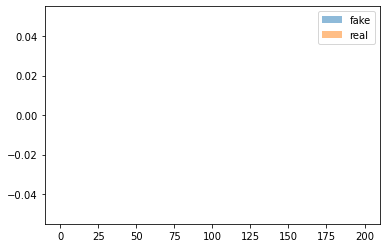

In [62]:
bins = np.linspace(0, 200, 40)

plt.hist(dfo[dfo['value']=='false']['body_len'], bins, alpha=0.5, label='fake')
plt.hist(dfo[dfo['value']=='true']['body_len'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.show()

In [63]:
print('There are {} null values'.format(len(df2)-len(dfo['text'].dropna())))

There are 0 null values


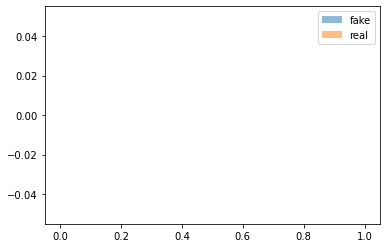

In [64]:
bins = np.linspace(0,1, 40)

plt.hist(dfo[dfo['value']=='false']['try2'], bins, alpha=0.5, label='fake')
plt.hist(dfo[dfo['value']=='true']['try2'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.show()

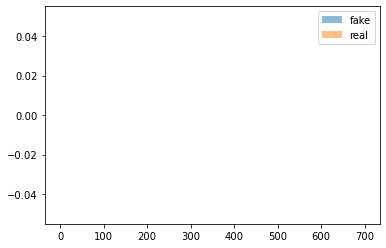

In [65]:
bins = np.linspace(0, 700, 40)

plt.hist(dfo[dfo['value']=='false']['count_punct'], bins, alpha=0.5, label='fake')
plt.hist(dfo[dfo['value']=='true']['count_punct'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.show()

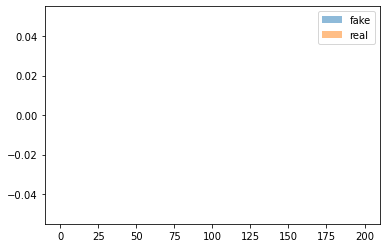

In [66]:
bins = np.linspace(0, 200, 40)

plt.hist(dfo[dfo['value']=='false']['count_ws'], bins, alpha=0.5, label='fake')
plt.hist(dfo[dfo['value']=='true']['count_ws'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Body length dist')

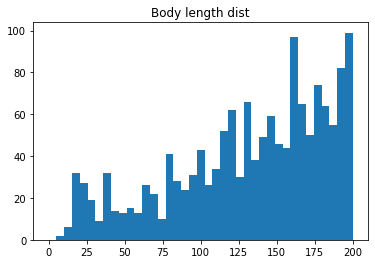

In [67]:
plt.hist(dfo['body_len'],bins)
plt.title('Body length dist')

Text(0.5, 1.0, 'Punctuation dist')

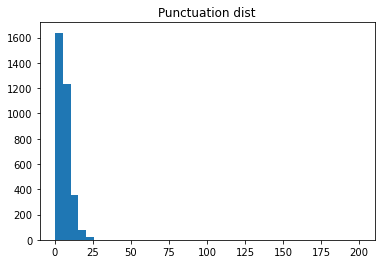

In [68]:
plt.hist(dfo['count_punct'],bins)
plt.title('Punctuation dist')

Text(0.5, 1.0, 'White Space length dist')

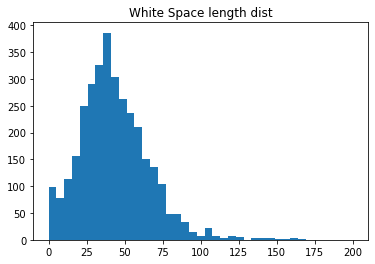

In [69]:
plt.hist(dfo['count_ws'],bins)
plt.title('White Space length dist')

Text(0.5, 1.0, 'Body length dist')

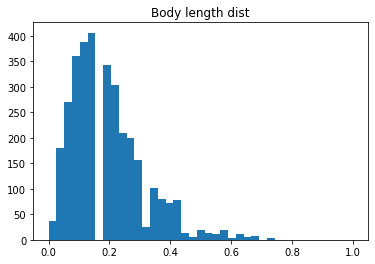

In [70]:
bins = np.linspace(0,1, 40)
plt.hist(dfo['try2'],bins)
plt.title('Body length dist')

In [71]:
dfo[dfo['body_len']==0]

,links,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len


In [72]:
dfn = dfo.drop(dfo['body_len']==0)
dfn.head()

,links,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T,-600.0,-300.0,-600.0,-600.0,6,50,0.182983,290
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T,-1200.0,-200.0,-1200.0,-1200.0,12,50,0.365965,304
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T,-600.0,-500.0,-600.0,-600.0,6,25,0.181598,143
4,Judge rips Capitol rioter’s Trump defense,At numerous bail hearings in the Capitol-riot-...,T,-600.0,-0.0,-600.0,-600.0,6,46,0.182760,236
5,Stephen Miller set to brief House conservatives,The main salvo will be delivered this weekend ...,T,-600.0,-0.0,-600.0,-600.0,6,70,0.184106,415


Text(0.5, 1.0, 'Body length dist')

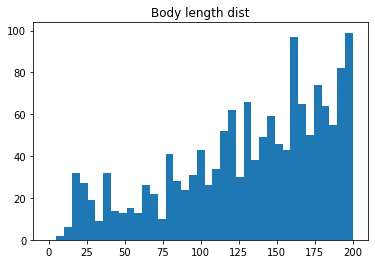

In [73]:
bins = np.linspace(0, 200, 40)
plt.hist(dfn['body_len'],bins)
plt.title('Body length dist')

In [74]:
dfn = dfn.replace(0,np.nan)
dfn[dfn['body_len']==0]

,links,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len


In [75]:
dfn = dfn.dropna()

Text(0.5, 1.0, 'Body length dist')

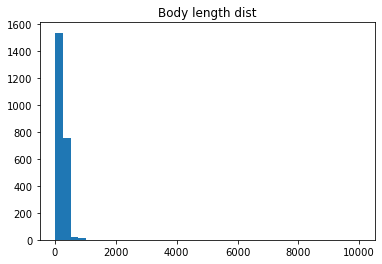

In [76]:
bins = np.linspace(0, 10000, 40)

plt.hist(dfn['body_len'],bins)
plt.title('Body length dist')

Text(0.5, 1.0, 'punct % dist')

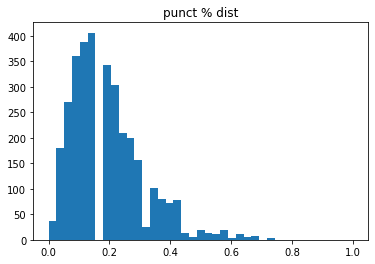

In [77]:
bins = np.linspace(0,1, 40)
plt.hist(dfo['try2'],bins)
plt.title('punct % dist')

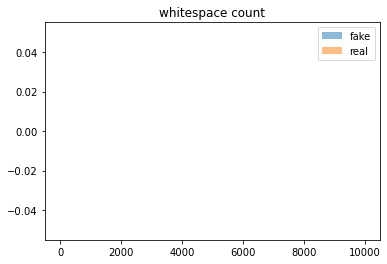

In [78]:
bins = np.linspace(0, 10000, 40)

plt.hist(dfn[dfn['value']=='false']['count_ws'], bins, alpha=0.5, label='fake')
plt.hist(dfn[dfn['value']=='true']['count_ws'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.title('whitespace count')
plt.show()

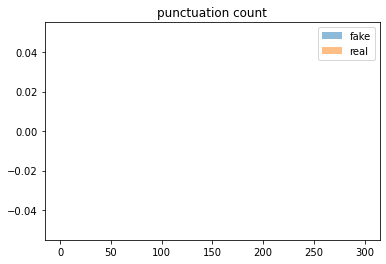

In [79]:
bins = np.linspace(0, 300, 40)

plt.hist(dfo[dfo['value']=='false']['count_punct'], bins, alpha=0.5, label='fake')
plt.hist(dfo[dfo['value']=='true']['count_punct'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.title('punctuation count')
plt.show()

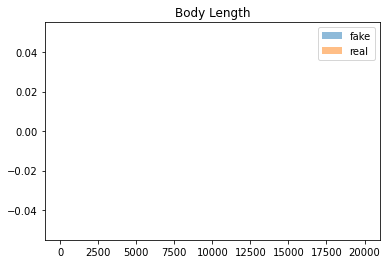

In [80]:
bins = np.linspace(0, 20000, 40)

plt.hist(dfn[dfn['value']=='false']['body_len'], bins, alpha=0.5, label='fake')
plt.hist(dfn[dfn['value']=='true']['body_len'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.title('Body Length')
plt.show()

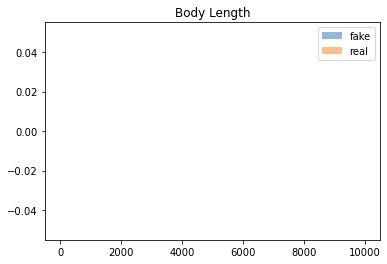

In [81]:
bins = np.linspace(0, 10000, 40)

plt.hist(dfn[dfn['value']=='false']['body_len'], bins, alpha=0.5, label='fake')
plt.hist(dfn[dfn['value']=='true']['body_len'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.title('Body Length')
plt.show()

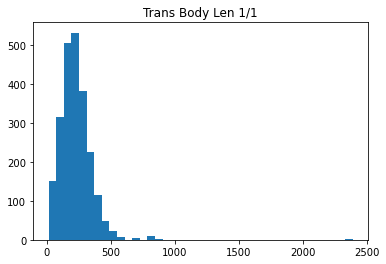

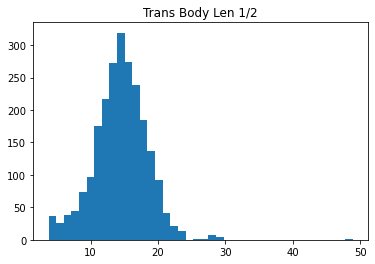

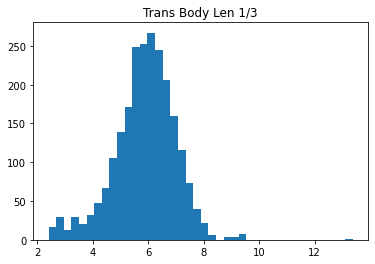

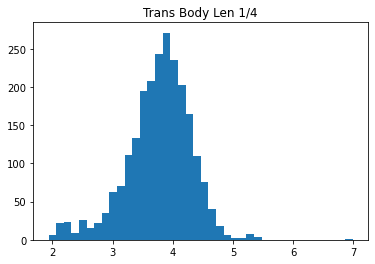

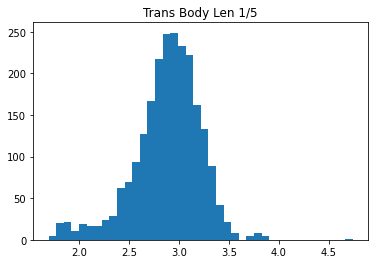

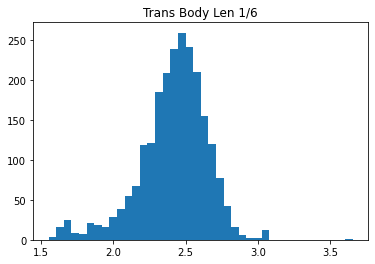

In [82]:
for i in [1,2,3,4,5,6]:
    plt.hist((dfn['body_len'])**(1/i),bins=40)
    plt.title('Trans Body Len 1/{}'.format(str(i)))
    plt.show()

In [83]:
#body_len 1/5 is the best distrobution
dfn['body_len']=(dfn['body_len'])**(1/5)

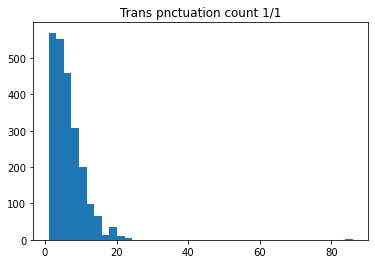

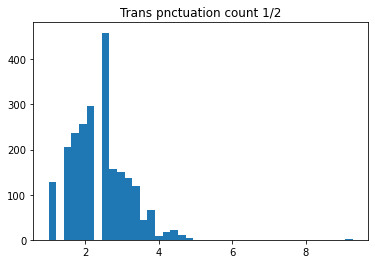

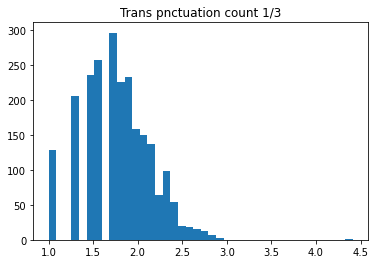

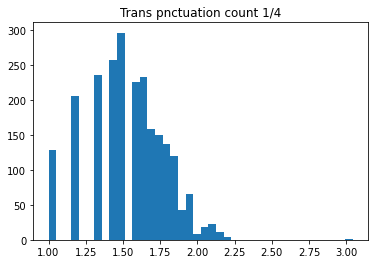

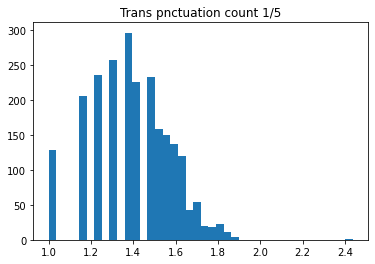

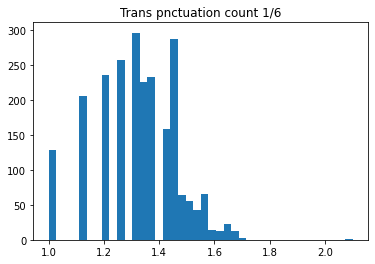

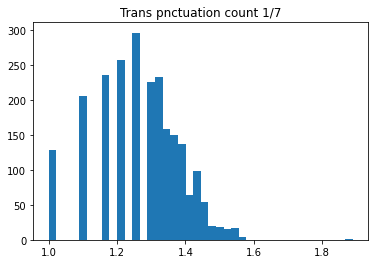

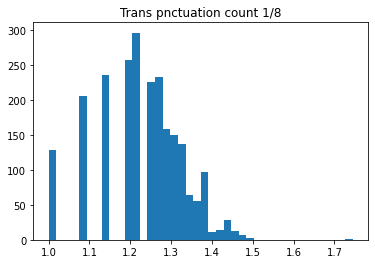

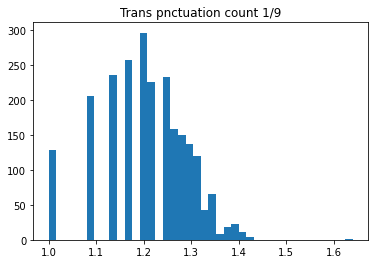

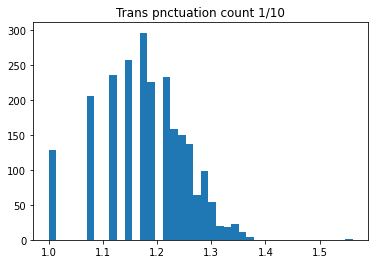

In [84]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    plt.hist((dfn['count_punct'])**(1/i),bins=40)
    plt.title('Trans pnctuation count 1/{}'.format(str(i)))
    plt.show()

In [85]:
#count_punct 1/9 has the best distrobution
dfn['count_punct']=(dfn['count_punct'])**(1/9)

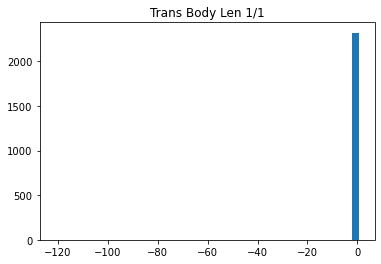

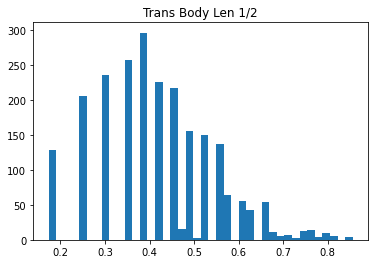

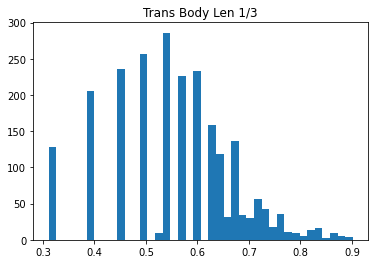

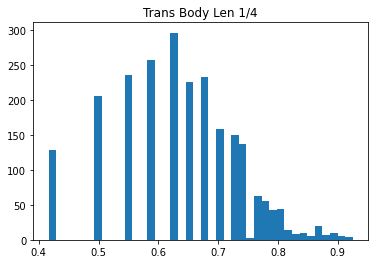

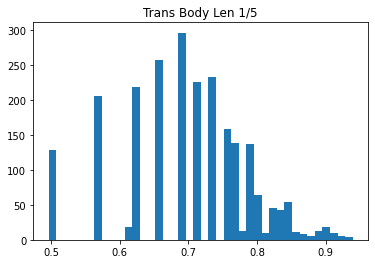

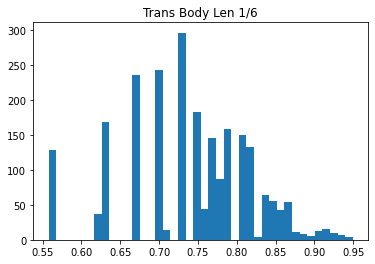

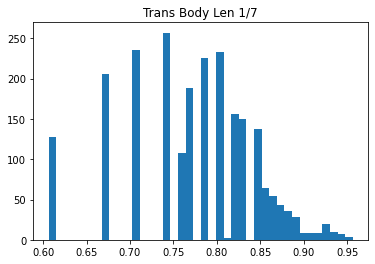

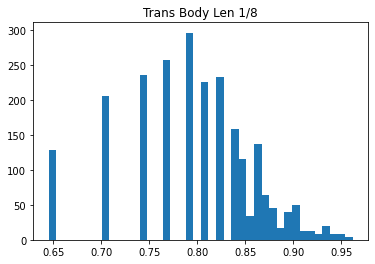

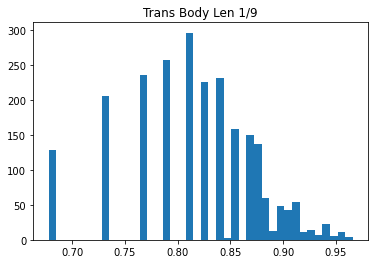

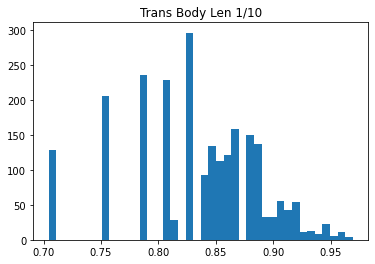

In [86]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    plt.hist((dfn['try2'])**(1/i),bins=40)
    plt.title('Trans Body Len 1/{}'.format(str(i)))
    plt.show()

In [87]:
#puntuation % best at 1/10
dfn['try2']=(dfn['try2'])**(1/10)

Text(0.5, 1.0, 'punct % dist')

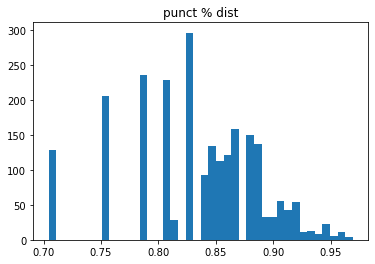

In [88]:
bins = np.linspace(0,0.1, 40)
plt.hist(dfn['try2'],bins=40)
plt.title('punct % dist')

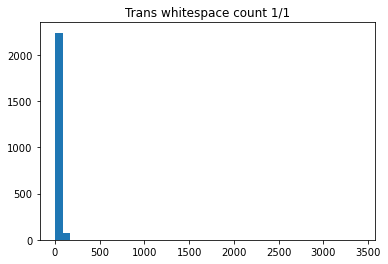

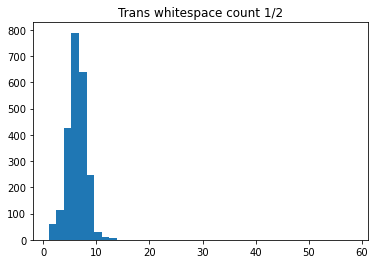

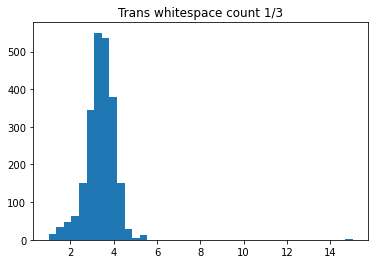

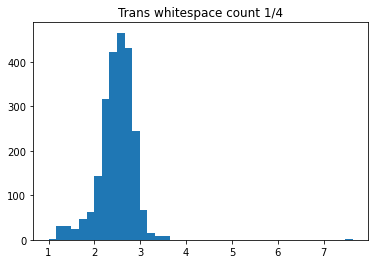

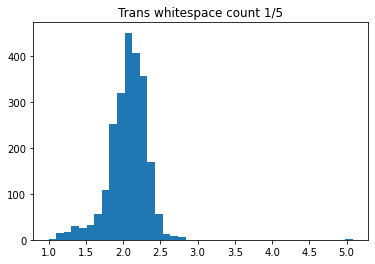

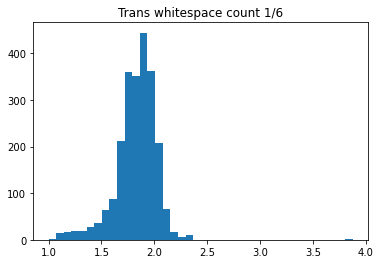

In [89]:
for i in [1,2,3,4,5,6]:
    plt.hist((dfn['count_ws'])**(1/i),bins=40)
    plt.title('Trans whitespace count 1/{}'.format(str(i)))
    plt.show()

In [90]:
#whitespace count best at 1/6
dfn['count_ws']=(dfn['count_ws'])**(1/6)

In [91]:
def count_twitters_user(x):
    twitter_username_re = re.compile(r'@([A-Za-z0-9_]+)')
    count = len(re.findall(twitter_username_re, x))
    return count

In [92]:
#fn = pd.read_csv('transformed_data.csv')

In [93]:
twitter_username_re = re.compile(r'@([A-Za-z0-9_]+)')
dfn['twitter'] = dfn.text.apply(lambda x: len(re.findall(twitter_username_re, x)))
dfn.head()

,links,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len,twitter
1,Democrats' $1.9T Covid aid bill faces the Sena...,MacDonough will dissect the budget impact of e...,T,-600.0,-300.0,-600.0,-600.0,1.220285,1.919383,0.843803,3.107990,0
2,"Lawrence Ferlinghetti, poet and activist, dies...",“The dominant American mercantile culture may ...,T,-1200.0,-200.0,-1200.0,-1200.0,1.317981,1.919383,0.904365,3.137435,0
3,‘It can only get better’: Linda Thomas-Greenfi...,U.N. officials told POLITICO they hope to see ...,T,-600.0,-500.0,-600.0,-600.0,1.220285,1.709976,0.843162,2.698157,0
6,"House Freedom Caucus opposes earmarks, setting...",But Republicans — who first banned earmarks wh...,T,-400.0,-100.0,-400.0,-400.0,1.166529,2.053573,0.810894,3.312795,0
8,Neera Tanden's Senate committee votes postponed,The Congressional Black Caucus is also prepari...,T,-300.0,-100.0,-300.0,-300.0,1.129831,1.799892,0.786913,2.796400,0


In [94]:
dfn[dfn['twitter']!=0]

,links,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len,twitter


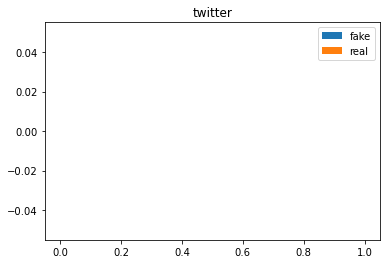

In [95]:

plt.hist(dfn[dfn['value']=='false']['twitter'], label='fake')
plt.hist(dfn[dfn['value']=='true']['twitter'], label='real')
plt.legend(loc='upper right')
plt.title('twitter')
plt.show()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 array([0.        , 0.0025641 , 0.00512821, 0.00769231, 0.01025641,
        0.01282051, 0.01538462, 0.01794872, 0.02051282, 0.02307692,
        0.02564103, 0.02820513, 0.03076923, 0.03333333, 0.03589744,
        0.03846154, 0.04102564, 0.04358974, 0.04615385, 0.04871795,
        0.05128205, 0.05384615, 0.05641026, 0.05897436, 0.06153846,
        0.06410256, 0.06666667, 0.06923077, 0.07179487, 0.07435897,
        0.07692308, 0.07948718, 0.08205128, 0.08461538, 0.08717949,
        0.08974359, 0.09230769, 0.09487179, 0.0974359 , 0.1       ]),
 <BarContainer object of 39 artists>)

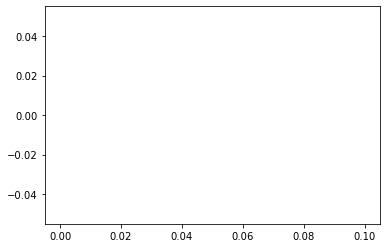

In [96]:
plt.hist(dfn[dfn['value']=='False']['twitter'], bins, alpha=0.5, label='fake')

In [97]:
dfn = dfn.sample(frac = 1)
dfn= dfn.reset_index()
del dfn['index']
dfn.head()

,links,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len,twitter
0,This Congress is the most diverse ever. But Hi...,"Policy staff of color, Brenson argues, would h...",T,-700.0,-200.0,-700.0,-700.0,1.241366,1.878922,0.856754,3.004922,0
1,Native Americans Finally Have a Cabinet Nomine...,"With all that in mind, the Tlingit and Indigen...",T,-800.0,-200.0,-800.0,-800.0,1.259921,2.075782,0.869229,3.346955,0
2,Merrick Garland Heads For Confirmation Hearing...,"""American Hustle, about the Abscam case; Argo,...",T,-1300.0,-100.0,-1300.0,-1300.0,1.329755,1.925728,0.911661,3.024295,0
3,This Congress is the most diverse ever. But Hi...,Even though the 117th Congress is historically...,T,-800.0,-200.0,-800.0,-800.0,1.259921,1.967454,0.868642,3.129135,0
4,Democrats question TV carriers' decisions to h...,“Free speech scholars argue that for a democra...,T,-400.0,-500.0,-400.0,-400.0,1.166529,1.931971,0.810323,3.040848,0


In [98]:
dfn.to_csv('trans.csv',index=False)
df2.to_csv('clean.csv',index=False)
#X_counts.to_csv('vectorized_data.csv')